# CNN

### CNN : 이미지 분류에 많이 활용됨

* Rule Based(예전) : 규칙에 부합하는 여부로 분류
  * 클래스마다 rule을 따로 지정해야 함, 규칙을 정하는 것이 어려움
* Data Driven : 데이터 기반으로 모델(블랙박스)을 만들어 해결
  * 이미지 -> 모델 -> 각 클래스에 부합할 확률

<img src="../../Images/Deep_Learning/CNN_0.JPG" width="400" height="200" title=""/> 

### 데이터 증강 기법 : Data Augmentation

* 원본 데이터에 변화를 가해 학습에 활용할 수 있는 새로운 데이터를 만드는 기법
  * 데이터를 다양한 방향(?)으로도 보려고 => 배경이랑 비슷한 색, 가려진 고양이 등
* Overfitting을 막기 위한 방법으로도 사용(데이터 수 늘리기)
* <img src="../../Images/Deep_Learning/CNN_1.JPG" width="600" height="300" title=""/>


### CNN 개념

#### CONV Layer

* 이미지를 구성하는 특징들이 근접 픽셀들끼리만 의존성을 가짐 => Spatial / Locality
* 전체 이미지 데이터에서 작은 사각형(filter)으로 돌면서 이미지 슬라이드
  * 32*32*3 이미지를 5*5*3으로 슬라이드(`내적`) 하면 28*28*1(32-5-1)
  * filter가 1개이므로 28*28*1이고 여러개면 그만큼 차원이 됨
  * <img src="../../Images/Deep_Learning/CNN_2.JPG" width="600" height="200" title=""/> 

* stride : 이동하면서 슬라이드(1이면 1칸 이동, 2이면 한번에 2칸 이동)
  * 소수점이 나오면 안됨(딱 나눠 떨어져야함)
  * <img src="../../Images/Deep_Learning/CNN_3.JPG" width="600" height="200" title=""/> 
* padding : side 부분을 더 고려하기 위함
  * <img src="../../Images/Deep_Learning/CNN_4.JPG" width="400" height="200" title=""/> 

#### Pooling Layer

* Pooling Layer
  * <img src="../../Images/Deep_Learning/CNN_5.JPG" width="400" height="200" title=""/> 
  * <img src="../../Images/Deep_Learning/CNN_7.JPG" width="400" height="200" title=""/> 

* Max Pooling : 최대값만 추출
* Average Pooling : 평균값 추출
* <img src="../../Images/Deep_Learning/CNN_6.JPG" width="400" height="200" title=""/> 

* Weight(Parameter) Sharing
  * MLP보다 더 작은 파라미터를 사용할 수 있음
  * 귀 parameter를 귀1/귀2로 나눌 필요가 없음!
* Translation Equivariance(CONV Layer와 연관) / Translation Invariance
  * <img src="../../Images/Deep_Learning/CNN_8.JPG" width="600" height="200" title=""/> 

### MLP Vs CNN

* <img src="../../Images/Deep_Learning/CNN_9.JPG" width="600" height="200" title=""/>
* MLP : Flatten이 반드시 필요함
* <img src="../../Images/Deep_Learning/CNN_10.JPG" width="600" height="200" title=""/>
* CNN : 일부 덩어리로 판단함, 이미지 전체를 학습할 수 있음
* <img src="../../Images/Deep_Learning/CNN_11.JPG" width="600" height="200" title=""/>


### Hyperparameter

* Hyperparameter : 사람이 정하는 값
* Hyperparameter와 선정 방식
  * <img src="../../Images/Deep_Learning/CNN_12.JPG" width="600" height="200" title=""/>
* Hyperparameter 종류
  * <img src="../../Images/Deep_Learning/CNN_13.JPG" width="600" height="200" title=""/>

---

# Pytorch

In [5]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_data = datasets.CIFAR10(
    root="../data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test_data = datasets.CIFAR10(
    root="../data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
print('CIFAR10 data size:', train_data.data[0].shape)

CIFAR10 data size: (32, 32, 3)


시각화를 위해 필요한 모듈

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

시각화 함수

In [8]:
def visualize(augmentation_func):
    fig, subplots = plt.subplots(2, 4, figsize=(14, 7)) # 2행 4열에 size 14x7
    for i in range(4):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+4]

        original_img = Image.fromarray(train_data.data[i])
        augmented_img = augmentation_func(original_img)

        axi1.imshow(original_img)
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('augmented_img')

### Random Rotation

random으로 이미지를 회전시킴

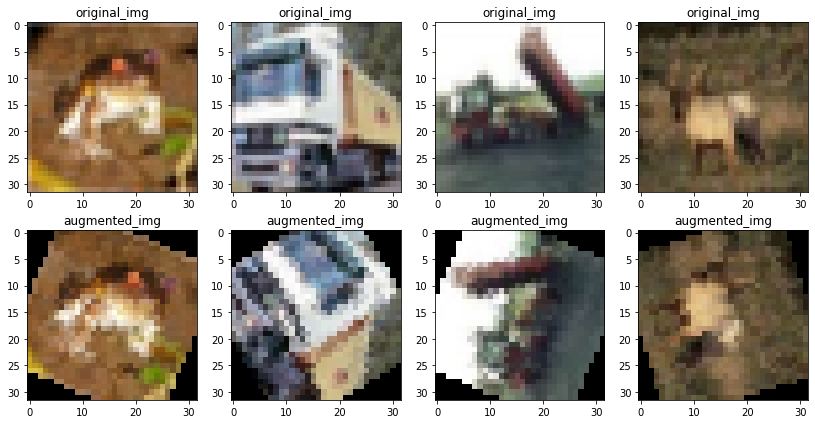

In [9]:
rotation = transforms.RandomRotation(90) # -90에서 90도로 랜덤으로 돌린다는 의미
visualize(rotation)

### Random Horizontal Flip

Horizontal 방향으로 p의 확률로 이미지가 뒤집힘

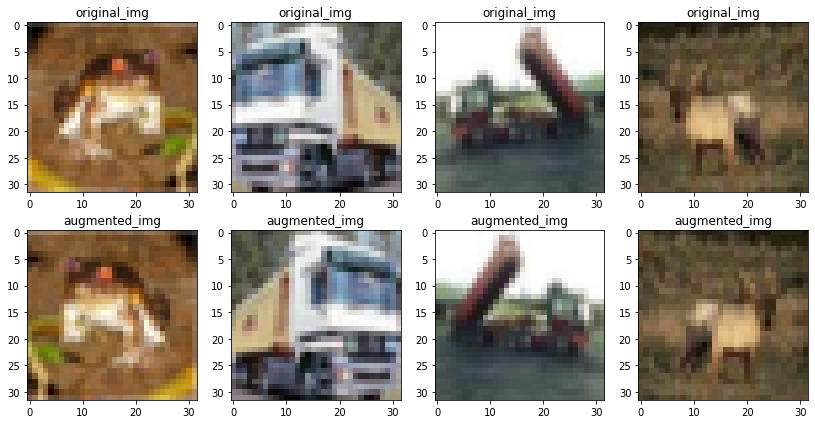

In [10]:
horizontal_flip = transforms.RandomHorizontalFlip(p=1) # p의 확률로 RandomHorizontalFlip이 적용
visualize(horizontal_flip)

### Random Vertical Flip

Vertical 방향으로 p의 확률로 이미지가 뒤집힘

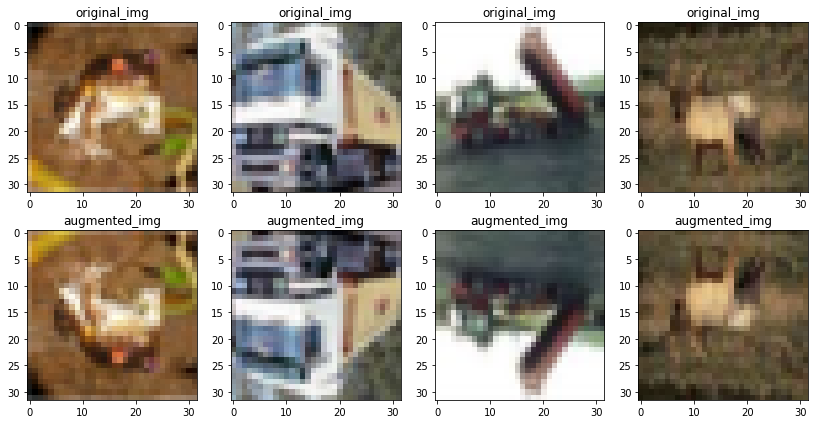

In [11]:
vertical_flip = transforms.RandomVerticalFlip(p=1)
visualize(vertical_flip)

### Random Crop

random한 위치에서 이미지가 잘림

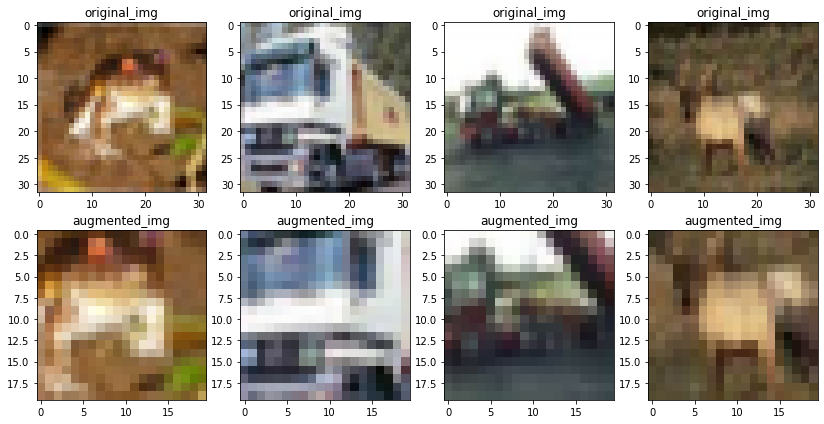

In [12]:
crop = transforms.RandomCrop((20, 20)) # 현재 이미지 사이즈 32x32에서 20x20 만큼 자름
visualize(crop)

### Resize

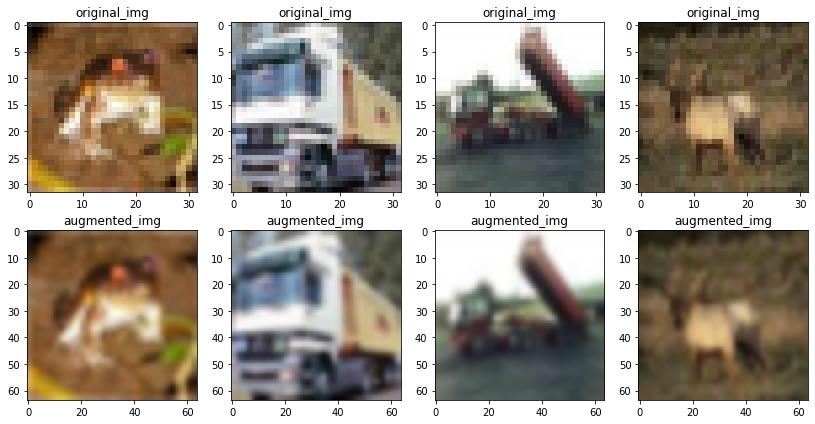

In [13]:
resize = transforms.Resize((64,64)) # 원래 32x32 -> 64x64
visualize(resize)

### Random Resized Crop

random으로 이미지를 자른 후 일정 사이즈로 다시 resize

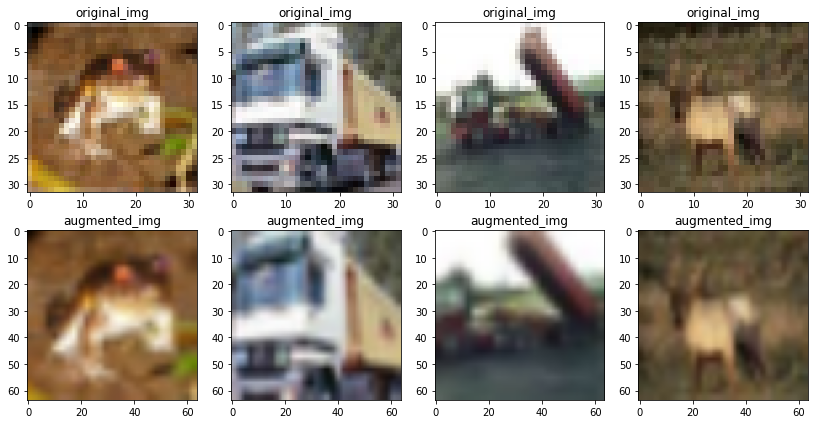

In [14]:
resized_crop = transforms.RandomResizedCrop((64,64)) # Crop 후 32x32 -> 64x64 로 resize
visualize(resized_crop) 

### Random Gray Scale

일정 확률로 이미지를 gray scale로 변환

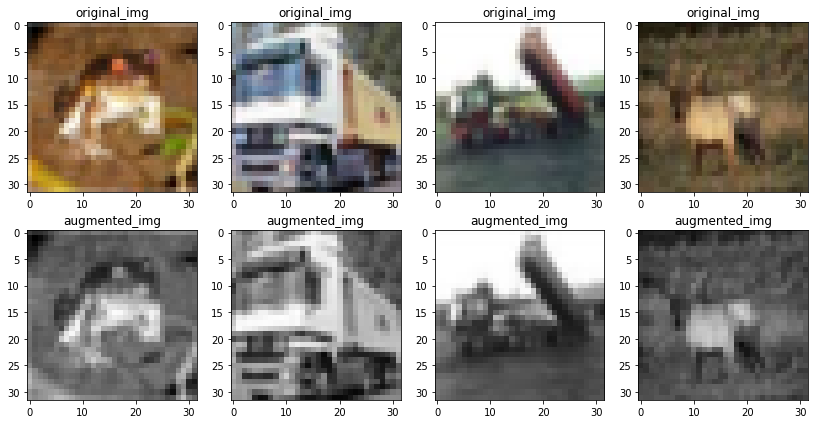

In [15]:
gray = transforms.RandomGrayscale(p=1) # p=1의 확률 적용
visualize(gray)

### Random Perspective

random으로 이미지의 perspective를 바꿈

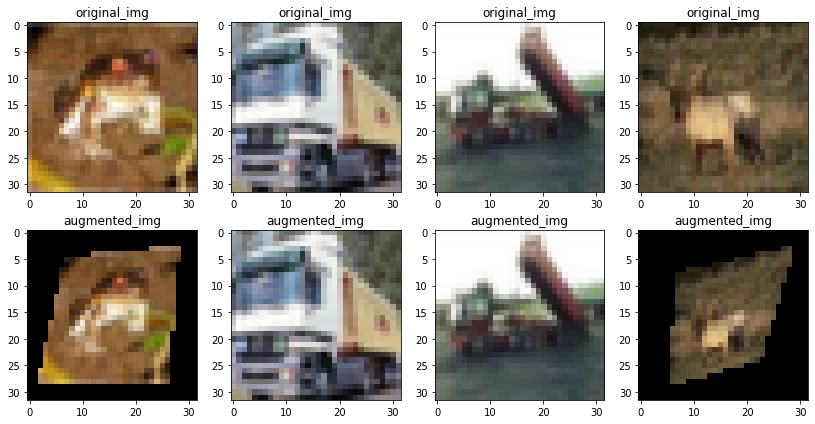

In [16]:
perspective = transforms.RandomPerspective()
visualize(perspective)

### Color Jutter

Random으로 juttering을 적용함 (Brightness, contrast, saturation and hue of an image) => 밝기 정도

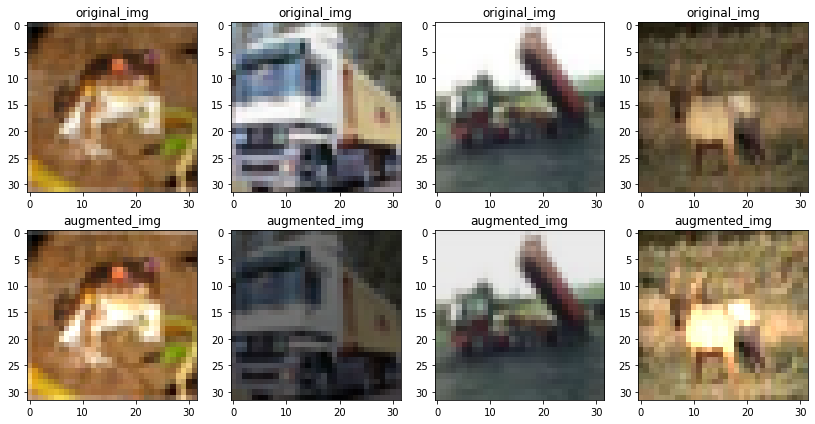

In [17]:
jitter = transforms.ColorJitter(brightness=(0.2,2)) # (min, max)
visualize(jitter)

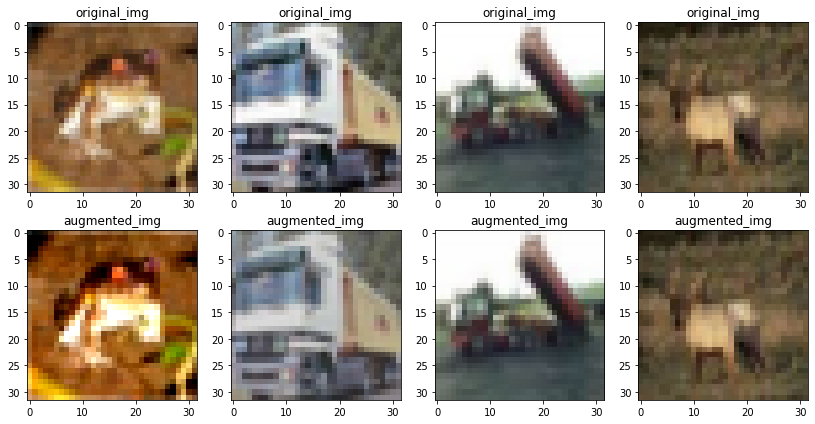

In [18]:
jitter = transforms.ColorJitter(contrast=(0.2,2)) # (min, max)
visualize(jitter)